In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = 5, 10
import rawpy
import matplotlib.pyplot as plt
import ollama
import time
from PIL import Image
from io import BytesIO

In [2]:
base_dir="/mnt/pictures/"
pics = ["2019/01/_DSC1240.NEF", # lunar eclipse
        "2019/01/_DSC1250.NEF", # Bad lunar eclipse
        "2019/03/_DSC1504.NEF", # Lake
        "2019/03/_DSC1506.NEF", # Blurry bird
        "2019/03/_DSC1542.NEF", # Blurry sky
        "2020/_DSC2736.NEF", # Lake
        "2021/_DSC2910.NEF", # Monument
        "2021/_DSC3166.NEF", # Milky Way
        "2021/_DSC3715.NEF", # Beach
        "2023/_DSC4231.NEF", # Bird
        "2023/_DSC4178.NEF", # Dinosaur
        "2024/_DSC4336.NEF" # Fountain
       ]

In [3]:
raws = [rawpy.imread(base_dir+f) for f in pics]

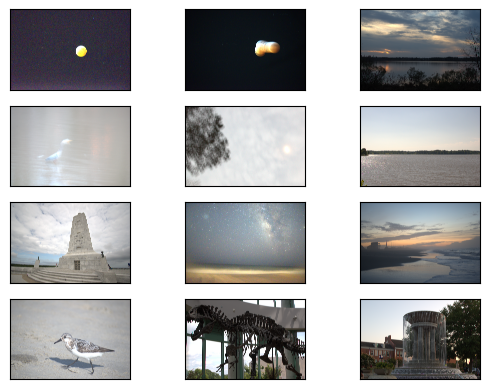

In [4]:
fig, axs = plt.subplots(4, 3)
for r, a in zip(raws, axs.flatten()):
    rgb = r.postprocess(use_auto_wb=True)
    a.imshow(rgb)
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)

In [5]:
prompt="""
You are a program made to describe and rate photographs.
Come up with a description of the photograph, paying special attention to the content and setting.
Also come up with a rating from 0 to 10. Give a high rating to an interesting well composed photographs. Give low ratings to out of focus, blurry, or uninteresting photographs.
Also determine if there are any problems such as if primary subject of the photo is blurry or out of focus or the photo is too dark or too light.
Return a json document containing a field "description" that has the description, a field "rating" that has the rating, and a boolean field "problems" if the image has any problems.
Return only the json document.
"""

In [6]:
models = ["gemma3:4b"]#, "gemma3n:e4b"]
for model in models:
    print(f"Model {model}")
    for i, raw in enumerate(raws):
        print(f"Image #{i}")
        rgb = raw.postprocess(use_camera_wb=True)
        im = Image.fromarray(rgb)
        bs = BytesIO()
        im.save(bs, format='JPEG')
        start = time.time()
        resp = ollama.generate(model=model, prompt=prompt, images=[bs.getvalue()], format="json")
        print(f"time: {time.time()-start:.2} seconds\n{resp.response}\n\n")
        

Model gemma3:4b
Image #0
time: 2.6e+01 seconds
{"description": "The photograph presents a simple, isolated shot of a full moon against a dark, almost entirely black sky. The moon is the dominant subject, appearing as a bright, round orb. The background is a deep, featureless black, offering no context or other elements besides the moon. It's a stark, minimalist composition.","rating": 6, "problems": false}


Image #1
time: 5.1 seconds
{"description": "The image shows a close-up shot of a single, bright orange spherical object. The object dominates the frame, with a soft, diffused orange glow surrounding it. The background is completely black, creating a stark contrast and isolating the subject. The lighting appears to be artificial and focused solely on the sphere.", "rating": 6, "problems": false}


Image #2
time: 5.7 seconds
{
  "description": "The photograph depicts a serene lake scene at dusk. The dominant feature is the calm, reflective surface of the lake, mirroring the warm hues